# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Прочитаем таблицу. 
в таблице видим большое количество пропущенных значений в разных колонках.
Наибольшее количество пропущенных значений в столбцах: "is_apartment", "balcony", "ceiling_height". А так же в колонках с расстоянием до парков, аэропортов.
Возможно, что это связано с тем, что это не обязательные пункты для заплнения в объявлении о продаже.

### Шаг 2. Предобработка данных

In [3]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#изменяем тип данных с object на datetime64

In [4]:
data.isna().sum()
# посмотрим, в каких колонках есть пропущенные значения.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

Наиболее вероятно, что пустые значения в столбце с количеством балконов означают их отсутствие. Поэтому заменим пропущенные значение 0.

In [6]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['days_exposition'].head()

0      0
1     81
2    558
3    424
4    121
Name: days_exposition, dtype: int64

Тоже самое происходит с пропущенными значениями в столбце с количеством дней размещения объявления. Пропущенные значения означают, что объявление еще не снято. Эти пропуски можем заменить на "0", так как количество дней не известно.

In [7]:
data = data.dropna(subset = ['floors_total'])

In [8]:
data['floors_total'] = data['floors_total'].astype('int')

Удаляем строки с поропущенными значеними в столбце с количеством этажей.

In [9]:
print(data['living_area'].corr(data['total_area']))
print(data['living_area'].corr(data['rooms']))

0.9397704889780092
0.8460058343889175


Выведем столбцы с наибольшей корреляцией для стобца "living_area". По столбцам с наибольшей корреляцией заполним пропуски.

In [10]:
data['total_area'] = data['total_area'].astype('int') # приводим общую площадь к целочисленному значению для укрупнения груп
data['living_area'] = data.groupby('total_area')['living_area'].transform(lambda x: x.fillna(x.mean()))
data['living_area'] = data.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.mean()))

Группируем датафрейм по столбцам с наибольшей корреляцией. 
По этим группам вычисляем среднее значение жилой площади.
Этими средними значениями заполняем пропущенные значения в столбце "living_area".

In [11]:
print(data['kitchen_area'].corr(data['total_area']))
print(data['kitchen_area'].corr(data['living_area']))
print(data['kitchen_area'].corr(data['rooms']))


0.6093975100349847
0.43494524475179414
0.26967212407892854


In [12]:
data['kitchen_area'] = data.groupby('total_area')['kitchen_area'].transform(lambda x: x.fillna(x.mean()))
data['kitchen_area'] = data.groupby('living_area')['kitchen_area'].transform(lambda x: x.fillna(x.mean()))

Теже действия произведем с пропущенными значениями площади кухни.

In [13]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце со значениями высоты потолков (ceiling_height) есть как пропущенные значения, так и выбросы значений в обе стороны. 
Заполним пропуки медианным значением. 

Так же избавимся от выбросов сделав срез по таблице. Минимальным значением высоты укажем - 2.5 метра, так как это минимальное значение по ГОСТу. Максимал значением высоты укажем - 3.7 метра, Это значение , хоть и выше ГОСТа, но часто вчтречается в домах, постренных в середине 20 века.

In [14]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
data['ceiling_height'].describe()

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [15]:
clear_data = data.query('(ceiling_height >= 2.5) & (ceiling_height <=3.7)')
clear_data['ceiling_height'].describe()

count    23361.000000
mean         2.689114
std          0.188016
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.700000
Name: ceiling_height, dtype: float64

Сделаем срез таблицы по значениям высоты потолка от 2.5 до 3.7 метра. Сохраним его в новый датафрем.

### Шаг 3. Посчитайте и добавьте в таблицу

In [16]:
clear_data['price_per_meter'] = (clear_data['last_price'] / clear_data['total_area']).astype('int')
clear_data['price_per_meter']

0        120370
1         83750
2         92785
3        408176
4        100000
          ...  
23694     72932
23695     52542
23696     44642
23697    150986
23698     42187
Name: price_per_meter, Length: 23361, dtype: int64

Добавляем новый столбей с ценой за квадратный метр. Цена указана в рублях за квадратный метр.

In [17]:
clear_data['year'] = clear_data['first_day_exposition'].dt.year
clear_data['month'] = clear_data['first_day_exposition'].dt.month
clear_data['weekday'] = clear_data['first_day_exposition'].dt.weekday

Добавляем в таблицу столбцы отдельно для года, месяца и дня недели.

In [18]:
def floor_func(row):
    if row[8] == 1:
        return 'первый этаж'
    if row[8] == row[6]:
        return 'последний этаж'
    else:
        return 'другое'

In [19]:
clear_data['floor_type'] = clear_data.apply(floor_func, axis=1)

Содаем функцию, которая на вход получает строку датафрейма, а на выходе выдает категории по этажу, на котором распологается квартира. Если значение в столбце:
- равно 1, то квартира находится на первом этаже
- равно значению в столбец с количеством этажей в доме, то квартира находится на последнем этаже.
- не равно ни одному из предыдущих значений  то квартира находится на другом этаже.

In [20]:
clear_data['living_area_ratio'] = clear_data['living_area'] / clear_data['total_area']
clear_data['kitchen_area_ratio'] = clear_data['kitchen_area'] / clear_data['total_area']


Посчитаем и добавим в таблицу отношение жилой площаи и площади кухни к общей площади квартиры.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

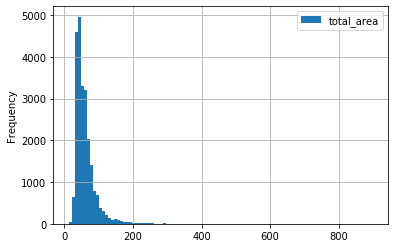

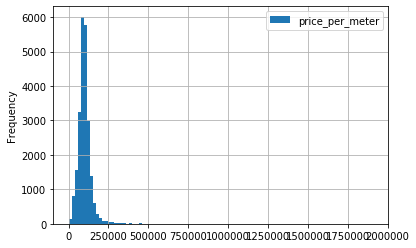

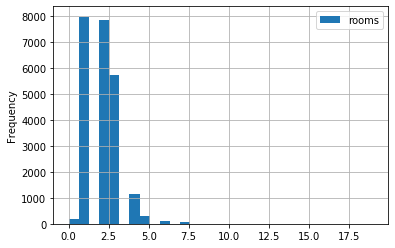

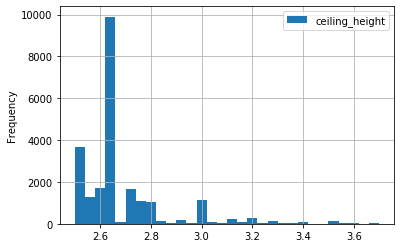

In [21]:
def hist_func(df, column, bins_count):
    df.plot(kind='hist', 
                y=column,
                bins=bins_count,
                alpha=1,
                grid=True)
    plt.show()

hist_func(clear_data, 'total_area', 100)
hist_func(clear_data, 'price_per_meter', 100)
hist_func(clear_data, 'rooms', 30)
hist_func(clear_data, 'ceiling_height', 30)

Выводим гистограммы для 4 параметров:
- площадь квартиры
- цена за квадратный метр
- число комнат
- высота потолков
    

Для каждого параметра мы получилиг график нормального распределения. Но так же в каждом графике мы имеем выбросы значений.


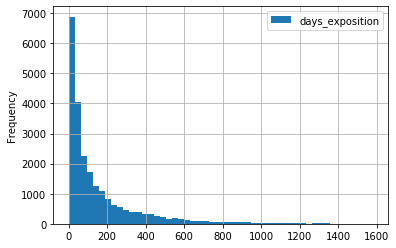

Медианное время продажи квартиры: 73 дня
Среднее время продажи квартиры: 156 дней

0     3124
45     871
60     536
7      232
30     206
90     200
4      175
3      157
5      150
14     144
Name: days_exposition, dtype: int64


In [22]:
hist_func(clear_data, 'days_exposition', 50)

days_exposition = clear_data['days_exposition']
print('Медианное время продажи квартиры:', days_exposition.median().astype('int'), 'дня')
print('Среднее время продажи квартиры:', days_exposition.mean().astype('int'), 'дней')
print()
print(days_exposition.value_counts().head(10))

На этом графике мы видим распределение Пуассона. Это происходит из-за того, что наибольшее количество значение = 0, то есть квартира еще не продана. Так же мы видим длинный хвост значений после 200 дней.
    
Если не принимать в расчет нулевые значения, чаще всего срок размещения объявления состовляет 45-60 дней или 1,5-2 месяца.
Из этого делаем вывод, что быстрой можно считать продажу совершенную в течение месяца, а необычно долгой - более 3-х месяцев.

Проверим это убрав редкие и выбивающиеся значения.

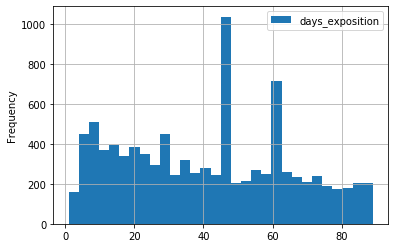

In [23]:
days_exposition_normal = clear_data.query('(days_exposition != 0) & (days_exposition < 90)')

hist_func(days_exposition_normal, 'days_exposition', 30)

На графике мы видим постепенное уменьшейние количества снятых объявлений с пиками на 45-ом и 60-ом дне. 
Возможно, что эти пики являются ограничением площадок, на которых размещены объявления и свидетельствую, что на 45 и 60 день, объявления просто снимают, не смотря на то, продана квартира или нет.

Исходя из данных этого графика делаем корректировки в гипотезе:
- очень быстрая продажа - в течение первой недели.
- среднее время продажи 1,5 - 2 месяца.
- долгая продажа - более 2-х месяцев.

In [24]:
clear_data['rooms'].corr(clear_data['price_per_meter'])

0.04090950342733799

In [25]:
def scatter_plot (df, x_col, y_col):
    df.plot(x=x_col, y=y_col, kind='scatter', grid=True, figsize=(6,6), legend=True)
    plt.show()
  # создадим функцию для построения точечного графика. На вход функция получает датафрейм, значения по осям "х" и "y"

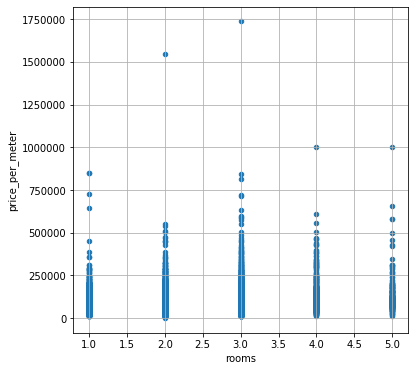

0.04090950342733799

In [26]:
scatter_plot(clear_data.query('(rooms <= 5) & (rooms > 0)'), 'rooms', 'price_per_meter')
clear_data['rooms'].corr(clear_data['price_per_meter'])

Цена квадратного метра не сильно зависит от количества комнат. 

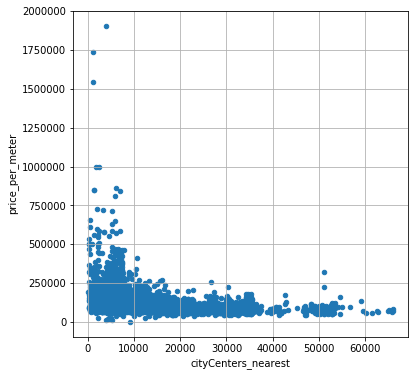

-0.31655223323534404

In [27]:
scatter_plot(clear_data, 'cityCenters_nearest', 'price_per_meter')
clear_data['cityCenters_nearest'].corr(clear_data['price_per_meter'])

Есть небольшая зависимость цены квадратного метра от расстояния до центра.
Самые дорогие квартиры находятся в пределах 10 км от центра. 

In [28]:
print(clear_data.pivot_table(index='floor_type', values='price_per_meter', aggfunc=['mean', 'median']))
print()
print('Среднее значение цены за кв.м :', clear_data['price_per_meter'].mean().round())
print('Медианное значение цены за кв.м :', clear_data['price_per_meter'].median().round())

                          mean          median
               price_per_meter price_per_meter
floor_type                                    
другое           103626.696954         98611.0
первый этаж       82179.488904         81529.5
последний этаж    92971.692824         88205.0

Среднее значение цены за кв.м : 99485.0
Медианное значение цены за кв.м : 95348.0


По данной сводной таблицы видно что среднеей и медианное значения имеют зависимость от этажа, на котором расположена квартира.
- Цена кв.м квартиры на первом этаже в среднем дешевле на 15 000 рублей.
- Цена кв.м квартиры на последнем этаже в среднем дешевле на 7000 рублей.

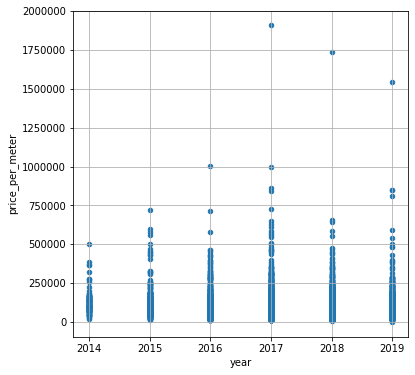

0.013140562750622233

In [29]:
scatter_plot(clear_data, 'year', 'price_per_meter')
clear_data['year'].corr(clear_data['price_per_meter'])

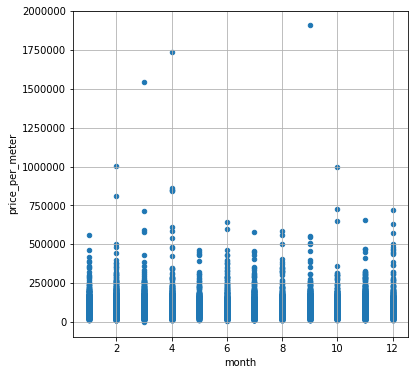

-0.002206781987227337

In [30]:
scatter_plot(clear_data, 'month', 'price_per_meter')
clear_data['month'].corr(clear_data['price_per_meter'])

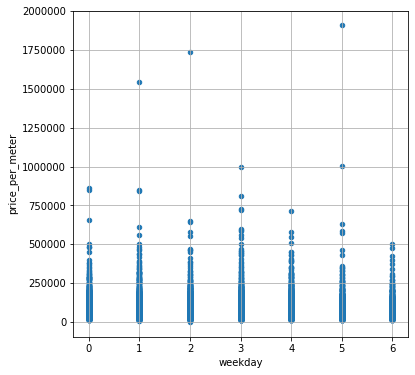

-0.007653663006014451

In [31]:
scatter_plot(clear_data, 'weekday', 'price_per_meter')
clear_data['weekday'].corr(clear_data['price_per_meter'])

Судя по точечным диаграмма и значениям корреляции Пирсона, прямая зависимость между стоимостью квадратного метра и датой размещения объявления отсутствует.
Так же на диаграмме для года видим, что в 2017 было намног больше квартир с ценой за кв. м. от 500 000 и выше.

In [32]:
clear_data = clear_data.replace('посёлок Мурино', 'Мурино')
clear_data = clear_data.replace('поселок Мурино', 'Мурино')
clear_data = clear_data.replace('деревня Кудрово', 'Кудрово')
clear_data['locality_name'].value_counts().head(10)
# Так как значений не много, вручную заполним смысловые дубликаты в столбце с названием населенных пунктов.

Санкт-Петербург      15469
Мурино                 584
Кудрово                469
посёлок Шушары         438
Всеволожск             395
Пушкин                 361
Колпино                337
посёлок Парголово      326
Гатчина                305
Выборг                 232
Name: locality_name, dtype: int64

In [33]:
locality_name_values = clear_data['locality_name'].value_counts().reset_index()[0:10]
#создаем таблицу с количеством объявлений в каждом населенном пункте.
locality_name_price = clear_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
locality_name_values.columns = ['locality_name', 'value']
#создаем сводную таблицу со средней ценой в каждом населенном пункте.

In [34]:
localiti_name_values_price = locality_name_values.merge(locality_name_price, on='locality_name')
localiti_name_values_price.sort_values(by='price_per_meter', ascending=False)
# объединим таблицы в одну методом .merge()

,locality_name,value,price_per_meter
0,Санкт-Петербург,15469,114852.157541
5,Пушкин,361,103111.731302
2,Кудрово,469,95816.462687
7,посёлок Парголово,326,90706.279141
1,Мурино,584,86656.714041
3,посёлок Шушары,438,78921.351598
6,Колпино,337,75755.468843
8,Гатчина,305,69111.481967
4,Всеволожск,395,68945.589873
9,Выборг,232,58400.224138


По данной таблице мы видим, что самая высокая стоимость жилья в Санкт-Петербургу, а самая низкая в Выборге.

In [35]:
spb_flats = clear_data.query('locality_name == "Санкт-Петербург"')
spb_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,year,month,weekday,floor_type,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370,2019,3,3,другое,0.472222,0.231481
2,10,5196000.0,56,2015-08-20,2,2.65,5,34.300000,4,NaN,False,False,8.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,2015,8,3,другое,0.612500,0.148214
3,0,64900000.0,159,2015-07-24,3,2.65,14,89.887500,9,NaN,False,False,15.525,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176,2015,7,4,другое,0.565330,0.097642
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,2018,6,1,другое,0.320000,0.410000
7,5,7915000.0,71,2019-04-18,2,2.65,24,41.967457,22,NaN,False,False,18.900,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,111478,2019,4,3,другое,0.591091,0.266197


Выделим квартиры находящейся в Санкт-Петербурге. 
Создадим новый датафрейм "spb_flats" в котором будут квартиры находящиеся в Санкт-Петербурге.

In [36]:
spb_flats['center_distance'] = (spb_flats['cityCenters_nearest'] / 1000).round()

Переведем расстояние до центра города из метров в километры и округлим до целого. 
Запишем эти значения в отдельный столбец.

In [37]:
spb_flats.pivot_table(index='center_distance', values='price_per_meter', aggfunc='mean').head()

,price_per_meter
center_distance,
0.0,252172.739130
1.0,175926.688889
2.0,153836.906574
3.0,121309.997015
4.0,133272.271903


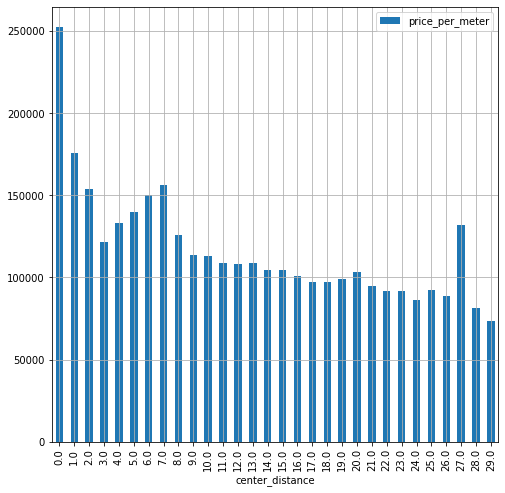

In [38]:
(spb_flats.pivot_table(index='center_distance', values='price_per_meter', aggfunc='mean')
          .plot(y='price_per_meter', kind='bar', grid=True, figsize=(8,8))
)

In [39]:
spb_flats.query('center_distance == 27') # проверим, какое количество квартир расположено в 27 км. от центра

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,year,month,weekday,floor_type,living_area_ratio,kitchen_area_ratio,center_distance
748,13,14350000.0,74,2017-11-28,2,3.13,5,30.0,3,NaN,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128,193918,2017,11,1,другое,0.405405,0.337838,27.0
5961,6,2250000.0,32,2018-02-27,1,2.65,2,16.5,2,NaN,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178,70312,2018,2,1,последний этаж,0.515625,0.218750,27.0


На графике показано, как меняется средняя цена за кв. м от расстояния до центара. 
На графике мы видим несколько сильных изменений: 
- на 3 км - это граница центральной зоны. Так как разница между вторым и третим километром значительная (Примерно равна 25 000)
- на 8 км - еще один скачек цен. Возможно, что на расстоянии 7 км от ценра начинаются спальные районы, в которых цена ниже, чем в центральных.
- на 27 км. - это выброс значения. На данном расстоянии в таблице всего два объявления.

In [40]:
# Выделим квартиры расположенные в центральной зоне.
spb_central_flats = spb_flats.query('center_distance < 3')
spb_central_flats

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,year,month,weekday,floor_type,living_area_ratio,kitchen_area_ratio,center_distance
24,8,6500000.0,97,2015-10-31,2,2.65,3,46.500000,1,NaN,False,False,19.600000,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,67010,2015,10,5,первый этаж,0.479381,0.202062,2.0
155,8,96000000.0,317,2017-07-07,4,3.50,3,183.000000,3,NaN,False,False,NaN,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62,302839,2017,7,4,последний этаж,0.577287,NaN,2.0
207,11,9000000.0,72,2018-09-08,2,2.90,5,43.200000,4,NaN,False,False,11.400000,0,Санкт-Петербург,22794.0,1645.0,2.0,276.0,3.0,485.0,0,125000,2018,9,5,другое,0.600000,0.158333,2.0
213,11,8700000.0,111,2016-10-10,4,3.10,4,73.200000,2,NaN,False,False,14.100000,0,Санкт-Петербург,20936.0,1218.0,1.0,463.0,3.0,55.0,791,78378,2016,10,0,другое,0.659459,0.127027,1.0
226,17,7950000.0,86,2019-04-24,4,2.65,3,52.700000,1,NaN,False,False,12.700000,0,Санкт-Петербург,31729.0,2468.0,0.0,NaN,0.0,NaN,0,92441,2019,4,2,первый этаж,0.612791,0.147674,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,4,40000000.0,188,2017-05-29,6,2.65,6,109.510000,4,NaN,False,False,31.300000,0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30,212765,2017,5,0,другое,0.582500,0.166489,2.0
23399,16,15300000.0,97,2017-01-11,3,3.50,7,61.400000,2,NaN,False,False,9.500000,0,Санкт-Петербург,17863.0,1463.0,1.0,663.0,2.0,189.0,391,157731,2017,1,2,другое,0.632990,0.097938,1.0
23400,17,30000000.0,213,2017-09-28,7,3.40,5,151.400000,5,NaN,False,False,30.800000,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299,140845,2017,9,3,последний этаж,0.710798,0.144601,1.0
23602,0,8700000.0,73,2019-01-23,3,2.65,4,44.018929,4,NaN,False,False,10.944416,0,Санкт-Петербург,20415.0,2345.0,2.0,57.0,3.0,151.0,34,119178,2019,1,2,последний этаж,0.602999,0.149924,2.0


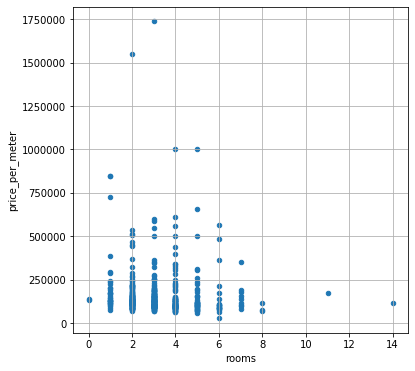

-0.05273820967033788

In [41]:
scatter_plot(spb_central_flats, 'rooms', 'price_per_meter')
plt.show()
spb_central_flats['rooms'].corr(spb_central_flats['price_per_meter'])

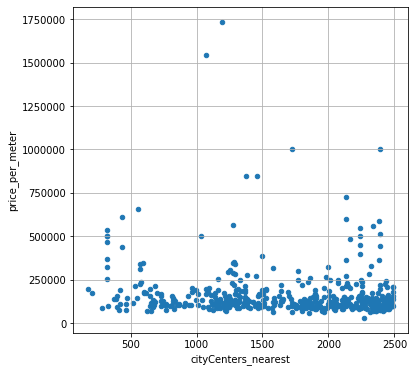

-0.10144486017058954

In [42]:
scatter_plot(spb_central_flats, 'cityCenters_nearest', 'price_per_meter')
spb_central_flats['cityCenters_nearest'].corr(spb_central_flats['price_per_meter'])

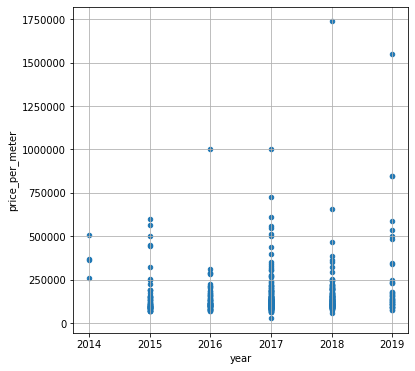

0.0782250773600794

In [43]:
scatter_plot(spb_central_flats, 'year', 'price_per_meter')
spb_central_flats['year'].corr(spb_central_flats['price_per_meter'])

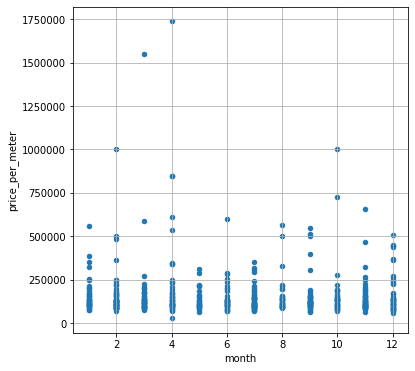

-0.02942035171332649

In [44]:
scatter_plot(spb_central_flats, 'month', 'price_per_meter')
spb_central_flats['month'].corr(spb_central_flats['price_per_meter'])

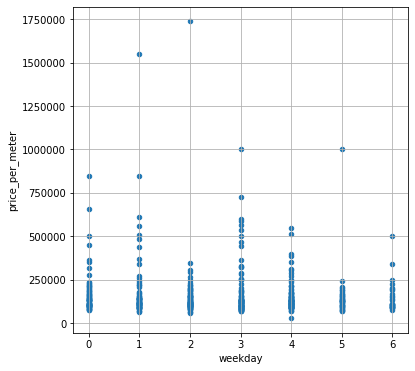

-0.06719457965991955

In [45]:
scatter_plot(spb_central_flats, 'weekday', 'price_per_meter')
spb_central_flats['weekday'].corr(spb_central_flats['price_per_meter'])

In [46]:
print(spb_central_flats.pivot_table(index='floor_type', values='price_per_meter', aggfunc=['mean', 'median']))
print()
print('Среднее значение цены за кв.м :', spb_central_flats['price_per_meter'].mean().round())
print('Медианное значение цены за кв.м :', spb_central_flats['price_per_meter'].median().round())

                          mean          median
               price_per_meter price_per_meter
floor_type                                    
другое           177318.904762          126986
первый этаж      132120.535211          114503
последний этаж   160734.858268          123728

Среднее значение цены за кв.м : 166516.0
Медианное значение цены за кв.м : 125000.0


Сравнив данные граффиков для всех квартир и для квартир в центре Санк-Петербурга, видим что зависимость цены за кв. м к различным параметрам не изменились, за исключением зависимости цены от расстояния до центра. Эта зависимость стала меньше. 

Так же немного изменилась зависимость стоимости кв. м. от этажа квартиры. Она стала больше и составляет:
- для первого этажа цена в среднем ниже на 30 000 рублей.
- для последнего этажа цена в среднем ниже на 6000 рублей.

### Шаг 5. Общий вывод

Проанализировав предоставленные данные можем сделать следующие выводы:

1) Санкт-Петербург - населенный пукнт с самой высокой ценой за кв. м. Так же он имеет наибольшее число объявлений о продаже, около 65%.
    
2) Наибольшее влияние на цену квадратного метра имеют: 
    - близость к центру. Чем ближе к центру, тем стоимсть кв. м. выше.
    - этаж на которм расположена квартира. Наименьшую стоимость за кв. м. имеют квартиры, расположенные на первом этаже. Наиболее вероятно это связано с тем, что на нижнем этаже слишком шумно и пыльно. Так же имеет влияние близость подвала. 
3) Судя по данным на сервисе Яндекс.Недвижимость среднее время продажи квартиры состовляет 1.5-2 месяца.